<center> <h1>PREDICIÓN DEL SUEÑO CON MLP MULTICLASE</h1> </center>
<center> <h4>Noemi González, Roberto Holgado y Carmen Plaza seco</h4> </center>


###### Indice

En este jupyter notebook se lleva a cabo la construcción de un clasificador MLP de salida multiclase para predecir el el estado de vigilia o sueño ligero y  el de sueño profundo.

    1. Clasficador MLP multiclase
        1.1 Preparación datos de entrada y salida
        1.2 Creación del modelo y selección parámetros libres
        1.3 Evaluación del modelo
        1.4 Visualización de resultados

IMPORTAR MÓDULOS

In [1]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import svm
import sklearn

## 1. CLASIFICADOR MLP MULTICLASE

Se ha utilizado un perceptrón multicapa para clasificar las distintas fases del sueño. Es decir, se ha construido un clasificador con salida multiclase.

### 1.1 Preparación datos de entrada y salida

In [2]:
Train_multi= pd.read_csv('Train_multiclass.csv')
Test_multi= pd.read_csv('Test_multiclass.csv')

In [3]:
X_train_multi=Train_multi.drop(['Etiquetas multiclase', 'Etiquetas binarias','ID'], axis = 1) 
y_train_multi=Train_multi['Etiquetas multiclase']

X_test_multi=Test_multi.drop(['Etiquetas multiclase', 'Etiquetas binarias','ID'], axis = 1)
y_test_multi=Test_multi['Etiquetas multiclase']

### 1.2  Creación del modelo y selección parámetros libres

Se proponen posibles valores de neuronas en la capa oculta para ver con cuál de ellos se obtienen las mejores prestaciones para el modelo. Se crea una tabla que recoge la pérdidas para cada valor del número de neuronas y aquel que tenga menos pérdida es el que se utilizará para el conjunto de test.

Se estudia el número de neuronas para un rango de 4 a 20 cogiendo los valores con saltos de 3.

In [4]:
# Tabla para recoger las prestaciones en train 
columns  = ['Loss','Score']
comp_train = pd.DataFrame(columns=columns)


In [5]:
# Número de neuronas de la capa oculta
n_hidden=range(4,20,3)

for i in n_hidden:
    
    print('\033[4;32m' + 'MLP clasiffier with',i,'neurons in the hidden layer' + '\033[0m')

    model=MLPClassifier(activation='relu', batch_size=50, hidden_layer_sizes=(i,), learning_rate='constant',
        learning_rate_init=0.1, shuffle=True, solver='sgd', early_stopping=True, verbose=True, n_iter_no_change=5)

    model.fit(X_train_multi, y_train_multi)
    
    loss=model.loss_  
    comp_train = comp_train.set_value(i,('Loss','Score'),(loss,'Verbose'))

MLP clasiffier with 4 neurons in the hidden layer
Iteration 1, loss = 4.41414312
Validation score: 0.209877
Iteration 2, loss = 1.62074245
Validation score: 0.234568
Iteration 3, loss = 1.62384735
Validation score: 0.209877
Iteration 4, loss = 1.62392001
Validation score: 0.172840
Iteration 5, loss = 1.61936485
Validation score: 0.234568
Iteration 6, loss = 1.61934626
Validation score: 0.234568
Iteration 7, loss = 1.62109088
Validation score: 0.234568
Iteration 8, loss = 1.61985369
Validation score: 0.209877
Validation score did not improve more than tol=0.000100 for 5 consecutive epochs. Stopping.
MLP clasiffier with 7 neurons in the hidden layer
Iteration 1, loss = inf
Validation score: 0.148148
Iteration 2, loss = 2.10552582
Validation score: 0.209877
Iteration 3, loss = 2.20425551
Validation score: 0.197531
Iteration 4, loss = 2.22168230
Validation score: 0.197531
Iteration 5, loss = 2.22750583
Validation score: 0.148148
Iteration 6, loss = 2.22910397
Validation score: 0.197531
Ite

C:\Users\rober\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
C:\Users\rober\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
C:\Users\rober\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
C:\Users\rober\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
C:\Users\rober\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  


Iteration 8, loss = 2.05313974
Validation score: 0.209877
Iteration 9, loss = 2.05504172
Validation score: 0.197531
Iteration 10, loss = 2.05711000
Validation score: 0.197531
Validation score did not improve more than tol=0.000100 for 5 consecutive epochs. Stopping.
MLP clasiffier with 19 neurons in the hidden layer
Iteration 1, loss = inf
Validation score: 0.185185
Iteration 2, loss = 1.73597888
Validation score: 0.135802
Iteration 3, loss = 1.75650353
Validation score: 0.135802
Iteration 4, loss = 1.76073076
Validation score: 0.135802
Iteration 5, loss = 1.76018907
Validation score: 0.135802
Iteration 6, loss = 1.76152568
Validation score: 0.135802
Iteration 7, loss = 1.76089183
Validation score: 0.135802
Validation score did not improve more than tol=0.000100 for 5 consecutive epochs. Stopping.


C:\Users\rober\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  


Las medidas de prestación elegidas para la elección de una topología han sido el validation score y la pérdida. Ambas se pueden ver al aplicar el fit del modelo, gracias al parámetro verbose=True. La pérdida la hemos añadido a la siguiente tabla pero la accuracy de cada epoch para el conjunto de validación hay que verla en la celda anterior. Según estos resultados, la mejor topología de MLP sería la de **n_hidden_1 con X neuronas** en la capa oculta, ya que el par (loss,val_score) es el mejor.
En todos los casos el valor 'validation score' está entorno a 0.66, pero el número de neuronas de menor pérdida es X.

In [6]:
comp_train

,Loss,Score
4,1.61985,Verbose
7,2.23035,Verbose
10,1.62612,Verbose
13,10.6661,Verbose
16,2.05711,Verbose
19,1.76089,Verbose


### 1.3 Evaluación del modelo

Testeamos el modelo con el número de neuronas en la capa oculta que ofrece la menor pérdida (número neuronas = X)

In [7]:
columns  = ['Accuracy','Recall','F1-score']
comp_test = pd.DataFrame(columns=columns)

print('\033[4;32m' + 'MLP clasiffier with 4 neurons in the hidden layer' + '\033[0m')

model=MLPClassifier(activation='relu', batch_size=50, hidden_layer_sizes=4, learning_rate='constant',
    learning_rate_init=0.1, max_iter=30, shuffle=True, solver='sgd', tol=0.01, early_stopping=True,
    validation_fraction=0.2, verbose=True, n_iter_no_change=5)

model.fit(X_train_multi,y_train_multi)

predictions = model.predict(X_test_multi)
cr=classification_report(y_test_multi,predictions,output_dict=True)
acc,rec,f1=cr['weighted avg']['precision'],cr['weighted avg']['recall'],cr['weighted avg']['f1-score']

comp_test = comp_test.set_value('4', ('Accuracy','Recall','F1-score'),(acc,rec,f1))

MLP clasiffier with 4 neurons in the hidden layer
Iteration 1, loss = 4.67408263
Validation score: 0.172840
Iteration 2, loss = 1.64101529
Validation score: 0.185185
Iteration 3, loss = 1.62909886
Validation score: 0.185185
Iteration 4, loss = 1.62445858
Validation score: 0.185185
Iteration 5, loss = 1.62620259
Validation score: 0.185185
Iteration 6, loss = 1.62520511
Validation score: 0.185185
Iteration 7, loss = 1.62531779
Validation score: 0.172840
Iteration 8, loss = 1.62447333
Validation score: 0.185185
Validation score did not improve more than tol=0.010000 for 5 consecutive epochs. Stopping.


C:\Users\rober\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rober\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  app.launch_new_instance()


In [8]:
comp_test

,Accuracy,Recall,F1-score
4,0.0298512,0.172775,0.0509069


In [9]:
print("================Classification Report=================")
print(cr)

================Classification Report=================
{'0.0': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 33}, '1.0': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 43}, '2.0': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 39}, '3.0': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 43}, '5.0': {'precision': 0.17277486910994763, 'recall': 1.0, 'f1-score': 0.29464285714285715, 'support': 33}, 'accuracy': 0.17277486910994763, 'macro avg': {'precision': 0.03455497382198953, 'recall': 0.2, 'f1-score': 0.05892857142857143, 'support': 191}, 'weighted avg': {'precision': 0.02985115539595954, 'recall': 0.17277486910994763, 'f1-score': 0.05090688107703815, 'support': 191}}


### 1.5 Visualización de resultados
A continuación se muestra un ejemplo de las fases del sueño predichas frente a las reales. Para facilitar esta visualización, se muestran la mitad de la muestras del subconjunto de test. 

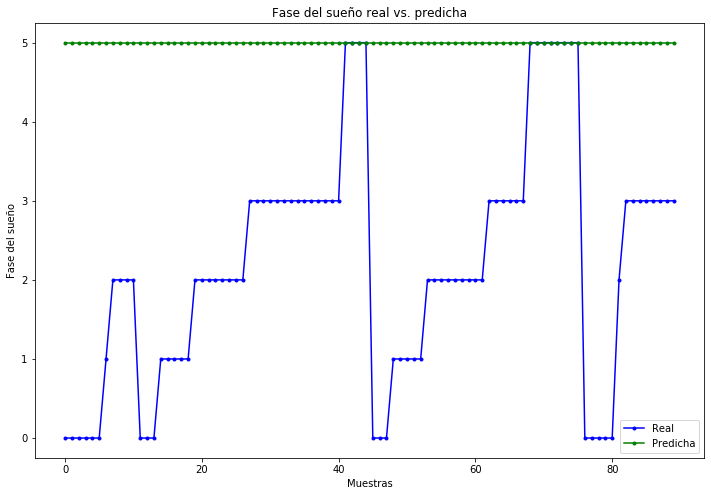

In [10]:
plt.figure(figsize=(12,8))
plt.plot(y_test_multi[0:90],color='blue', marker='.',label='Real')
plt.plot(predictions[0:90],color='green', marker='.',label='Predicha')

plt.title('Fase del sueño real vs. predicha')
plt.xlabel('Muestras')
plt.ylabel('Fase del sueño')
plt.legend()

**Residuos**

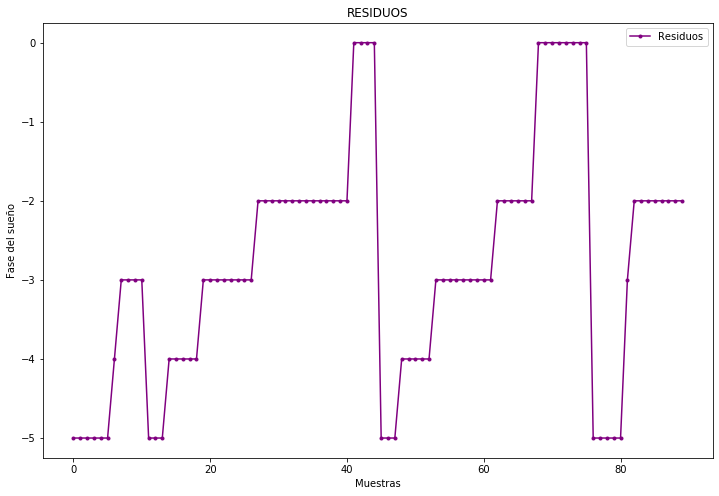

In [11]:
residuos= y_test_multi - predictions
plt.figure(figsize=(12,8))
plt.plot(residuos[0:90],color='purple', marker='.',label='Residuos')

plt.title('RESIDUOS')
plt.xlabel('Muestras')
plt.ylabel('Fase del sueño')
plt.legend()